# Projeto - Análise de Dados

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ROOT_PATH = Path().resolve().parent

In [4]:
OBESITY_FILE = "obesity-cleaned.csv"
OBESITY_FILE_PATH = os.path.join(ROOT_PATH, "data", OBESITY_FILE)

## Perguntas - Obesity among adults by country, 1975-2016

In [5]:
df_obesity = pd.read_csv(OBESITY_FILE_PATH)
df_obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [6]:
columns_to_go = [col for col in df_obesity.columns if not col.startswith("Unnamed")]
df_obesity = df_obesity.loc[:, columns_to_go]

In [7]:
df_obesity.dtypes

Country        object
Year            int64
Obesity (%)    object
Sex            object
dtype: object

In [8]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(
    lambda x: x.split(" ")[0]
    )

df_obesity["Obesity"] = df_obesity["Obesity"].apply(
    lambda x: x if "." in x else "0.0"
    ).astype(float)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [9]:
avg_obesity_2015 = df_obesity[df_obesity["Year"]==2015].groupby("Sex").agg({"Obesity":"mean"})
print(f"Percentual Médio da Obesidade mundial em 2015:")
avg_obesity_2015

Percentual Médio da Obesidade mundial em 2015:


,Obesity
Sex,
Both sexes,19.108205
Female,22.429744
Male,15.652821


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [10]:
year_list = df_obesity["Year"].unique()

start_year = year_list[0]
end_year = year_list[-1]

needed_cols = ["Year", "Country", "Obesity"]
df_obesity_start = df_obesity[df_obesity["Year"]==start_year].loc[:, needed_cols]
df_obesity_end = df_obesity[df_obesity["Year"]==end_year].loc[:, needed_cols]

df_obesity_increase_rate = pd.concat([df_obesity_start, df_obesity_end], axis=0)

In [11]:
df_obesity_increase_rate = df_obesity_increase_rate.pivot_table(
        values="Obesity", index="Country", columns="Year"
    ).reset_index()

df_obesity_increase_rate["rate"] = df_obesity_increase_rate[end_year] - df_obesity_increase_rate[start_year]

In [12]:
df_obesity_increase_rate = df_obesity_increase_rate.sort_values(
    by="rate", ascending=False
    ).reset_index(drop=True)

top_5_higher_rate = df_obesity_increase_rate.head(5)
top_5_lower_rate = df_obesity_increase_rate.tail(5)

In [13]:
top_5_higher_rate

Year,Country,1975,2016,rate
0,Tuvalu,17.933333,51.600000,33.666667
1,Niue,18.966667,49.966667,31.000000
2,Kiribati,16.000000,46.000000,30.000000
3,Tonga,19.933333,48.033333,28.100000
4,Cook Islands,28.033333,55.900000,27.866667


In [14]:
top_5_lower_rate

Year,Country,1975,2016,rate
190,Viet Nam,0.133333,2.1,1.966667
191,South Sudan,0.000000,0.0,0.000000
192,Monaco,0.000000,0.0,0.000000
193,San Marino,0.000000,0.0,0.000000
194,Sudan,0.000000,0.0,0.000000


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [15]:
df_obesity_agg_2015 = df_obesity[df_obesity["Year"]==2015].groupby(
    ["Country"]
    ).agg({"Obesity": "mean"}).sort_values(by="Obesity")

In [16]:
print("Abaixo, estão os países com os MENORES níveis de obesidade em 2015 ")

print("TOP 5:")
print(df_obesity_agg_2015.head(5).sort_values(
    by="Obesity", ascending=False
    ).to_dict()["Obesity"])

Abaixo, estão os países com os MENORES níveis de obesidade em 2015 
TOP 5:
{'Viet Nam': 1.9666666666666668, 'Sudan': 0.0, 'San Marino': 0.0, 'Monaco': 0.0, 'South Sudan': 0.0}


In [17]:
print("Abaixo, estão os países com os MAIORES níveis de obesidade em 2015 ")

print("TOP 5:")
print(df_obesity_agg_2015.tail(5).sort_values(
    by="Obesity", ascending=False
    ).to_dict()["Obesity"])

Abaixo, estão os países com os MAIORES níveis de obesidade em 2015 
TOP 5:
{'Nauru': 60.666666666666664, 'Cook Islands': 55.4, 'Palau': 54.76666666666667, 'Marshall Islands': 52.333333333333336, 'Tuvalu': 50.9}


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [18]:
df_obesity_brazil = df_obesity[df_obesity["Country"]=="Brazil"].pivot_table(
    columns=["Sex"], values="Obesity", index=["Country", "Year"]
).reset_index()

df_obesity_brazil.head()

Sex,Country,Year,Both sexes,Female,Male
0,Brazil,1975,5.2,7.3,3.0
1,Brazil,1976,5.5,7.6,3.2
2,Brazil,1977,5.7,8.0,3.4
3,Brazil,1978,6.0,8.3,3.6
4,Brazil,1979,6.3,8.7,3.8


In [19]:
df_obesity_brazil["diff_percent"] = (
    (df_obesity_brazil["Female"] - df_obesity_brazil["Male"])
    )

In [20]:
avg_percent_years_brazil = np.mean(df_obesity_brazil["diff_percent"])
avg_percent_years_brazil = round(avg_percent_years_brazil, ndigits=2)

print(f"A diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil é de: {avg_percent_years_brazil} %")

A diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil é de: 6.18 %


- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [21]:
df_obesity_sex_values = df_obesity.groupby(
    ["Year", "Sex"]
    ).agg({"Obesity": "mean"}).reset_index()


df_obesity_sex_values = df_obesity_sex_values.pivot_table(
    index="Year", values="Obesity", columns="Sex"
    ).reset_index()

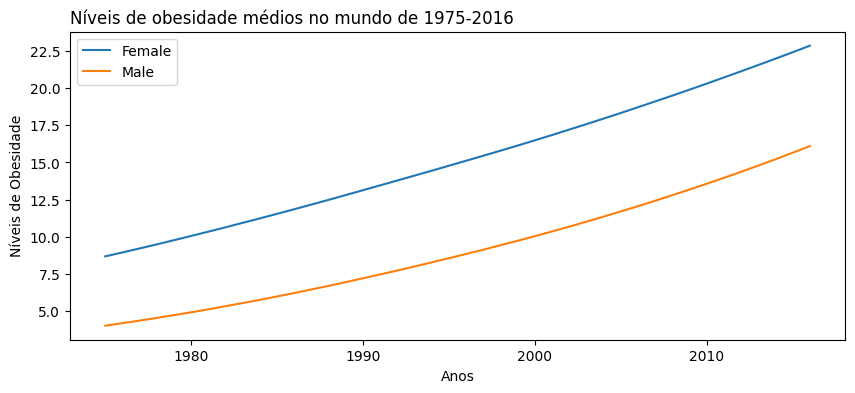

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_obesity_sex_values, x="Year", y="Female", label="Female")
sns.lineplot(data=df_obesity_sex_values, x="Year", y="Male", label="Male")
plt.legend()
plt.ylabel("Níveis de Obesidade")
plt.xlabel("Anos")
plt.title("Níveis de obesidade médios no mundo de 1975-2016", loc="left")
plt.show()

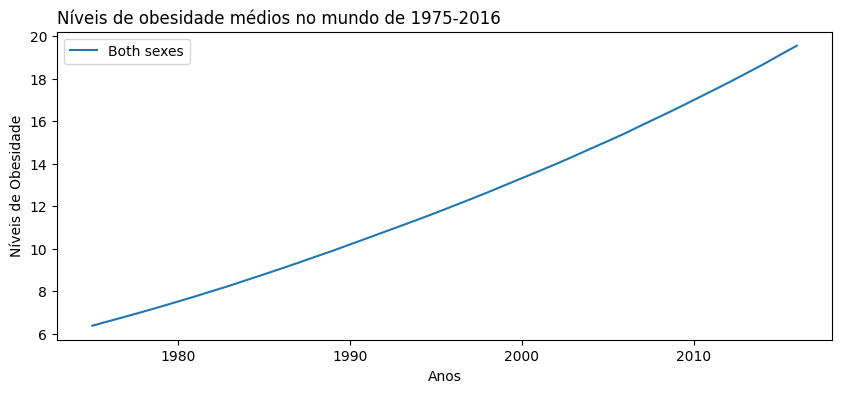

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_obesity_sex_values, x="Year", y="Both sexes", label="Both sexes")
plt.legend()
plt.ylabel("Níveis de Obesidade")
plt.xlabel("Anos")
plt.title("Níveis de obesidade médios no mundo de 1975-2016", loc="left")
plt.show()

## Perguntas - GDP Per Person (1901-2011)

In [24]:
GDP_FILE = "GDP.csv"
GDP_FILE_PATH = os.path.join(ROOT_PATH, "data", GDP_FILE)

In [25]:
df_gdp = pd.read_csv(GDP_FILE_PATH, decimal=".")
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [26]:
cols_gdp = [col.strip() for col in df_gdp.columns]
rename_cols = dict(zip(df_gdp.columns, cols_gdp))

df_gdp = df_gdp.rename(columns=rename_cols)

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [27]:
df_gdp["Year"] = df_gdp["Year"].apply(
    lambda x: x.split("/")[2]
).astype(int)

df_gdp["GDP_pp"] = df_gdp["GDP_pp"].apply(lambda x: x.replace(",", ""))

In [28]:
df_gdp["GDP_pp"] = pd.to_numeric(df_gdp["GDP_pp"])

- Você conseguiria informar o primeiro valor registrado de cada país?

In [29]:
df_gdp.groupby("Country")["Year"].min().value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [30]:
df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min() == 1991]

Country
Kosovo    1991
Name: Year, dtype: int32

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [31]:
start_year_gdp = pd.DataFrame(df_gdp.groupby("Region")["Year"].min()).reset_index()
end_year_gdp = pd.DataFrame(df_gdp[df_gdp["Year"]<2000].groupby("Region")["Year"].max()).reset_index()

In [32]:
df_gdp_start = pd.merge(
        left=start_year_gdp,
        right=df_gdp,
        on=["Region", "Year"]
    )

df_gdp_end = pd.merge(
        left=end_year_gdp,
        right=df_gdp,
        on=["Region", "Year"]
    )


In [33]:
df_gdp_rate = pd.concat([df_gdp_start, df_gdp_end], axis=0)
df_gdp_rate = df_gdp_rate.pivot_table(
        index="Region", columns="Year", values="GDP_pp"
    ).reset_index()

df_gdp_rate

Year,Region,1901,1996
0,Asia,900.756296,7311.992963
1,Australia and Oceania,1492.222000,7402.546000
2,Central America and the Caribbean,1460.596842,7396.853684
3,Europe,2583.788478,17932.684894
4,"Middle East, North Africa, and Greater Arabia",1164.350000,11145.343913
5,North America,3676.015000,25355.687500
6,South America,1638.665833,6753.330833
7,Sub-Saharan Africa,650.119783,2266.537174


In [34]:
df_gdp_rate["start_gdp"] = df_gdp_rate.apply(
    lambda row: row[1991] if row[1901]==np.nan else row[1901],
    axis=1
)

df_gdp_rate["rate"] = (df_gdp_rate[1996] - df_gdp_rate["start_gdp"]) / df_gdp_rate[1996]

In [35]:
df_gdp_rate.sort_values(by="rate", ascending=False).reset_index(drop=True)

Year,Region,1901,1996,start_gdp,rate
0,"Middle East, North Africa, and Greater Arabia",1164.350000,11145.343913,1164.350000,0.895530
1,Asia,900.756296,7311.992963,900.756296,0.876811
2,Europe,2583.788478,17932.684894,2583.788478,0.855917
3,North America,3676.015000,25355.687500,3676.015000,0.855022
4,Central America and the Caribbean,1460.596842,7396.853684,1460.596842,0.802538
5,Australia and Oceania,1492.222000,7402.546000,1492.222000,0.798418
6,South America,1638.665833,6753.330833,1638.665833,0.757354
7,Sub-Saharan Africa,650.119783,2266.537174,650.119783,0.713166


- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [36]:
for country in df_gdp["Country"].unique():
    temp = df_gdp[df_gdp["Country"]==country]
    temp.loc[:, "delta_GDP_pp"] = temp["GDP_pp"] - temp["GDP_pp"].shift(1)
    temp.loc[:, "delta_Year"] = temp["Year"] - temp["Year"].shift(1)
    df_gdp.loc[df_gdp["Country"]==country, "delta_GDP_pp"] = temp["delta_GDP_pp"]
    df_gdp.loc[df_gdp["Country"]==country, "delta_Year"] = temp["delta_Year"]

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_7840\244361391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, "delta_GDP_pp"] = temp["GDP_pp"] - temp["GDP_pp"].shift(1)
C:\Users\Vinicius\AppData\Local\Temp\ipykernel_7840\244361391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, "delta_Year"] = temp["Year"] - temp["Year"].shift(1)


In [37]:
df_gdp["avg_rate_year"] = (df_gdp["delta_GDP_pp"] / df_gdp["delta_Year"]).shift(-1)

In [38]:
years_range = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max()+1)

In [39]:
df_gdp_new = df_gdp.loc[:, ["Country", "Region"]].drop_duplicates()
df_gdp_new["Year"] = ""
df_gdp_new["Year"] = df_gdp_new["Year"].apply(
    lambda x: years_range
)

df_gdp_new = df_gdp_new.explode("Year").reset_index(drop=True)

In [40]:
df_gdp_new = pd.merge(
    left=df_gdp_new,
    right=df_gdp,
    on=["Country", "Region", "Year"],
    how="left"
    )

df_gdp_new["avg_rate_year"] = df_gdp_new["avg_rate_year"].ffill()

df_gdp_new["Tipo_Valor"] = df_gdp_new["GDP_pp"].apply(
    lambda x: "Estimado" if np.isnan(x) else "Real"
)

In [41]:
for country in df_gdp_new["Country"].unique():
    temp = df_gdp_new.loc[df_gdp_new["Country"]==country]
    start_index = temp[temp["Tipo_Valor"]=="Real"].index.min()

    temp = temp.loc[start_index:, :]#.reset_index(drop=True)

    for i in temp.index:
        if temp.loc[i, "Tipo_Valor"] == "Real":
            value = temp.loc[i, "GDP_pp"]
        else:
            value = temp.loc[i-1, "GDP_pp_New"] * (temp.loc[i, "avg_rate_year"]/100)
            value = temp.loc[i-1, "GDP_pp_New"] + value

        temp.loc[i, "GDP_pp_New"] = float(value)

    df_gdp_new.loc[df_gdp_new["Country"]==country, "GDP_pp_New"] = temp["GDP_pp_New"]

df_gdp_new = df_gdp_new.loc[:, ["Country", "Region", "Year", "GDP_pp_New"]]

In [42]:
df_gdp_new.loc[df_gdp_new["Country"]=="Brazil"]

,Country,Region,Year,GDP_pp_New
2553,Brazil,South America,1901,6.484800e+02
2554,Brazil,South America,1902,7.113696e+02
2555,Brazil,South America,1903,7.803582e+02
2556,Brazil,South America,1904,8.560374e+02
2557,Brazil,South America,1905,9.390559e+02
...,...,...,...,...
2659,Brazil,South America,2007,3.608843e+04
2660,Brazil,South America,2008,1.472870e+05
2661,Brazil,South America,2009,6.011195e+05
2662,Brazil,South America,2010,2.453337e+06
